## Red Wine Quality Prediction using machine learning
### TCR Innovations
#### Group Members:- Sulekha Mali, Sakshi Pingle, Preeti Rajpure

### 1. Importing required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree

### 2. Read Dataset file

In [2]:
#File path
file="C:\\Users\Jayu\Downloads\winequality-red.csv"
#Fields in dataset
names=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
data = pd.read_csv(file,sep=";",names=names)

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#dataset desciption
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 3. Data preprocessing

In [5]:
#Check if any null values
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

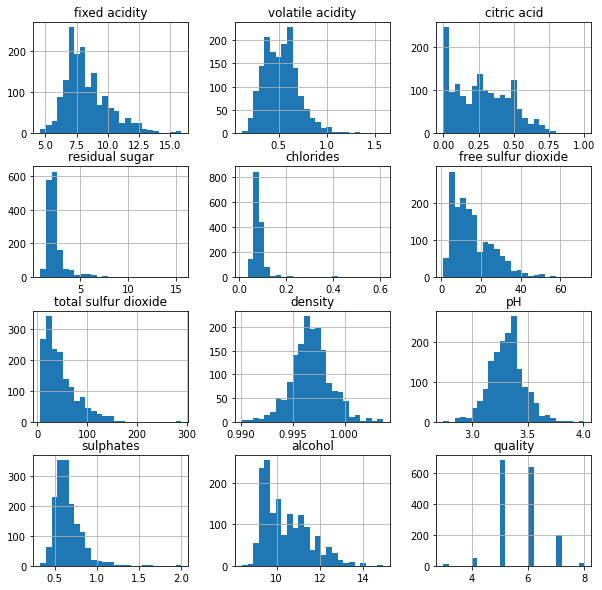

In [6]:
data.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()

#### Separate the labels and features into two different dataframes

In [7]:
#label
y = data.quality
#Features
X = data.drop('quality', axis=1)

### 4. Split Dataset into train and test data

In [8]:
#Make train and test data
#Test data is 20% of original data,rest 80% is used for training
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [9]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
89,7.0,0.620,0.08,1.8,0.076,8.0,24.0,0.99780,3.48,0.53,9.0
747,8.6,0.330,0.40,2.6,0.083,16.0,68.0,0.99782,3.30,0.48,9.4
545,9.1,0.470,0.49,2.6,0.094,38.0,106.0,0.99820,3.08,0.59,9.1
1052,5.6,0.605,0.05,2.4,0.073,19.0,25.0,0.99258,3.56,0.55,12.9
248,7.7,0.530,0.06,1.7,0.074,9.0,39.0,0.99615,3.35,0.48,9.8


In [10]:
#Data Normalisation
X_train_scaled = preprocessing.scale(X_train)
X_train_scaled

array([[-0.75190027,  0.49425149, -0.96645314, ...,  1.07944596,
        -0.75497532, -1.34700179],
       [ 0.17967854, -1.1082207 ,  0.67041813, ..., -0.08322855,
        -1.05144858, -0.96705631],
       [ 0.47079691, -0.33461344,  1.13078817, ..., -1.50427517,
        -0.3992074 , -1.25201542],
       ...,
       [ 1.28592837, -1.38450901,  1.23309263, ..., -0.72915883,
         1.3796322 , -0.96705631],
       [-0.6936766 ,  0.88105512, -1.17106205, ...,  0.82107385,
         0.07514983, -0.58711083],
       [-1.21768967,  0.54950915,  0.21004808, ...,  0.95025991,
         0.78668567, -1.06204268]])

### 4. Training our algorithm

In [11]:
#Training algorithm
clf=tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
#Checking efficiency of algorithm
confidence = clf.score(X_test, y_test)
print("\nThe confidence score:\n")
print(confidence)


The confidence score:

0.6


### 5. Prediction of data

In [13]:
y_pred = clf.predict(X_test)

In [14]:
#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 5 predictions
print("\nThe prediction:\n")
for i in range(0,5):
    print(x[i])
    
#printing first five expectations
print("\nThe expectation:\n")
print(y_test.head())


The prediction:

5
5
5
5
6

The expectation:

1567    5
370     5
1559    5
723     5
1490    6
Name: quality, dtype: int64


## THANK YOU!